In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<Axes: xlabel='cgpa', ylabel='package'>

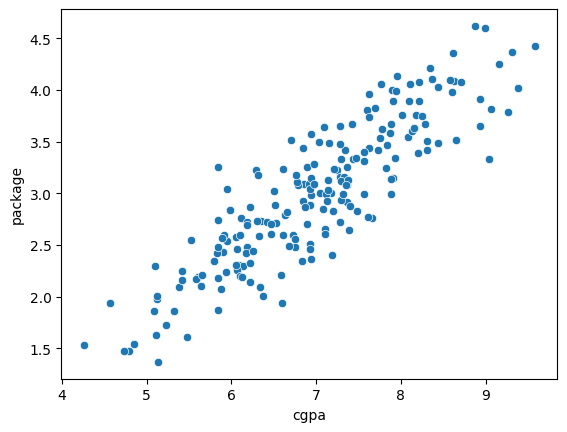

In [5]:
# Now lets visualize the relationship between them using scatterplot.
sns.scatterplot(x=df['cgpa'],y=df['package'],data=df)

In [11]:
# There is a Linear Relation , so we will make variables to store the input (X) and the output(y). 
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [15]:
X,y

(     cgpa
 0    6.89
 1    5.12
 2    7.82
 3    7.42
 4    6.94
 ..    ...
 195  6.93
 196  5.89
 197  7.21
 198  7.63
 199  6.22
 
 [200 rows x 1 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)

In [16]:
# We do train test split so that we will train the model on some data (inputs and outputs ) and we will evaluate its prediction by
# checking whether the model is able to predict correctly on the hidden unknown data which it was not trianed on.
X_train , X_test , y_train ,y_test  = train_test_split(X , y , test_size=0.2 , random_state= 2)

In [17]:
# Instantiate the Linear Regression model
lr = LinearRegression()

In [18]:
# Now fitting(the model learns the data passed) the lr model.
lr.fit( X_train , y_train ) # Note the test sets are strictly for evaluation passing here in any step to lr can cause data leaks.


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lr.intercept_,lr.coef_ # This returns the list/value of the intercept and the coeffecient for the Linear Equation of our model.

(np.float64(-0.8961119222429144), array([0.55795197]))

In [23]:
X_test[:11] 

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [25]:
y_test[:11]

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
Name: package, dtype: float64

In [29]:
# Now lets predict different values using the model and evalaute the model.
# First lets check using a value to predict , next we will use the X_test dataframe.

lr.predict(X_test.iloc[0].values.reshape(1,1)) # We predicted for the value of index 0 in X_test :8.58
# The model predicted : package = 3.89
# The actual expected value from y_test : package = 4.10
# There model is still off by values.

c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

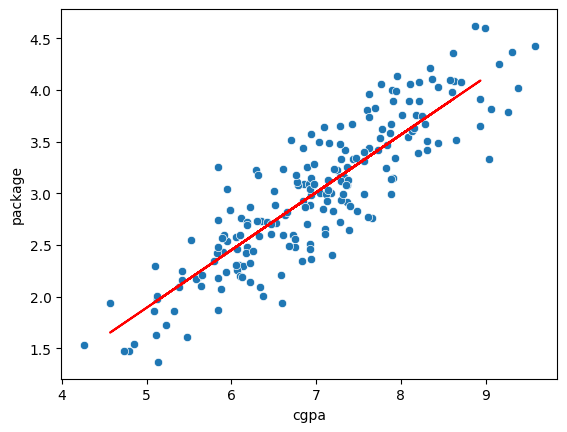

In [33]:
# Now we will check how well the line fits in the actual scatterplot by using the x_test column and the prediction of the column on X_test.
# We do this using the plot function where we fit a line from the points passed . 
sns.scatterplot(x = df.cgpa , y = df.package , data = df)
plt.plot(X_test , lr.predict(X_test) , data = df, color = 'red')

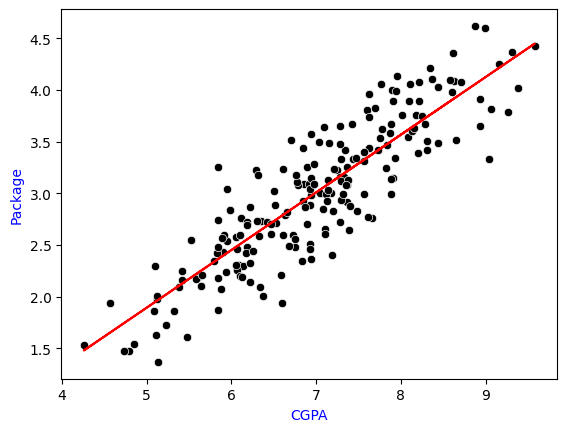

In [44]:
# To make sure we see the whole line we will use X_train for now 
sns.scatterplot(x = df.cgpa , y = df.package , data = df ,color='Black')
plt.plot(X_train , lr.predict(X_train) , data = df, color = 'red')
plt.xlabel("CGPA",color='blue')
plt.ylabel("Package",color='blue')
plt.show()